In [1]:
require(ggplot2)
require(e1071)
require(caret)
require(psych)
require(GPArotation)
require(dplyr)
require(Hmisc)

Loading required package: ggplot2
Loading required package: e1071
Loading required package: caret
Loading required package: lattice
Loading required package: psych

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

Loading required package: GPArotation
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Hmisc
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following object is masked from ‘package:psych’:

    describe

The following object is masked from ‘package:e1071’:

    impute

The following objects are 

In [2]:
# Reading the file
custDb <- read.csv("/Users/imnfkhri/R/DataByte/AllCaseStudies/Linear Regression/Cust_Database.csv")

In [3]:
head(custDb)

custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,⋯,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
3964-QJWTRG-NPN,1,2.00,1,20,2,September,15,3,1,⋯,0,0,0,1,1,0,0,0,1,0
0648-AIPJSP-UVM,5,5.00,0,22,2,May,17,4,2,⋯,1,1,1,1,1,1,1,0,0,0
5195-TLUDJE-HVO,3,4.00,1,67,6,June,14,2,2,⋯,1,0,0,0,0,0,1,0,0,0
4459-VLPQUH-3OL,4,3.00,0,23,2,May,16,3,2,⋯,1,0,1,1,1,0,1,1,0,0
8158-SMTQFB-CNO,2,2.00,0,26,3,July,16,3,2,⋯,1,0,1,0,1,0,0,0,1,0
9662-FUSYIM-1IV,4,4.00,0,64,5,August,17,4,3,⋯,1,1,0,0,0,0,0,0,1,0


In [4]:
# Viewing summary stats
summary(custDb)
Hmisc::describe(custDb)

             custid         region        townsize        gender      
 0002-GTOKLU-YVY:   1   Min.   :1.000   #NULL!:   2   Min.   :0.0000  
 0003-RLTRGE-IW2:   1   1st Qu.:2.000   1.00  :1436   1st Qu.:0.0000  
 0003-UTGKPR-PRU:   1   Median :3.000   2.00  :1048   Median :1.0000  
 0008-ZIQQOT-SGB:   1   Mean   :3.001   3.00  : 907   Mean   :0.5036  
 0012-CIVYLF-839:   1   3rd Qu.:4.000   4.00  : 857   3rd Qu.:1.0000  
 0014-DOIOFX-LXB:   1   Max.   :5.000   5.00  : 750   Max.   :1.0000  
 (Other)        :4994                                                 
      age            agecat          birthmonth         ed       
 Min.   :18.00   Min.   :2.000   September: 458   Min.   : 6.00  
 1st Qu.:31.00   1st Qu.:3.000   May      : 451   1st Qu.:12.00  
 Median :47.00   Median :4.000   January  : 420   Median :14.00  
 Mean   :47.03   Mean   :4.239   June     : 420   Mean   :14.54  
 3rd Qu.:62.00   3rd Qu.:5.000   February : 418   3rd Qu.:17.00  
 Max.   :79.00   Max.   :6.000   Mar

custDb 

 132  Variables      5000  Observations
--------------------------------------------------------------------------------
custid 
       n  missing distinct 
    5000        0     5000 

lowest : 0002-GTOKLU-YVY 0003-RLTRGE-IW2 0003-UTGKPR-PRU 0008-ZIQQOT-SGB 0012-CIVYLF-839
highest: 9991-FCIBKT-W29 9992-FSFJPL-5D6 9997-QIXKNU-54A 9998-ZGHXLK-EOT 9999-EGLHVE-19G
--------------------------------------------------------------------------------
region 
       n  missing distinct     Info     Mean      Gmd 
    5000        0        5     0.96    3.001    1.609 
                                        
Value          1     2     3     4     5
Frequency   1009   995  1003   966  1027
Proportion 0.202 0.199 0.201 0.193 0.205
--------------------------------------------------------------------------------
townsize 
       n  missing distinct 
    5000        0        6 
                                                    
Value      #NULL!   1.00   2.00   3.00   4.00   5.00
Frequency  

In [6]:
# Viewing datatypes
str(custDb, list.len = ncol(custDb))

'data.frame':	5000 obs. of  132 variables:
 $ custid           : Factor w/ 5000 levels "0002-GTOKLU-YVY",..: 1980 347 2606 2221 4037 4826 3670 4454 4531 1758 ...
 $ region           : num  1 5 3 4 2 4 2 3 2 2 ...
 $ townsize         : Factor w/ 6 levels "#NULL!","1.00",..: 3 6 5 4 3 5 6 5 4 3 ...
 $ gender           : num  1 0 1 0 0 0 1 1 1 0 ...
 $ age              : num  20 22 67 23 26 64 52 44 66 47 ...
 $ agecat           : num  2 2 6 2 3 5 5 4 6 4 ...
 $ birthmonth       : Factor w/ 12 levels "April","August",..: 12 9 7 9 6 2 6 11 11 6 ...
 $ ed               : num  15 17 14 16 16 17 14 16 12 11 ...
 $ edcat            : num  3 4 2 3 3 4 2 3 2 1 ...
 $ jobcat           : num  1 2 2 2 2 3 1 1 1 6 ...
 $ union            : num  1 0 0 0 0 0 0 0 0 0 ...
 $ employ           : num  0 0 16 0 1 22 10 11 15 19 ...
 $ empcat           : num  1 1 5 1 1 5 3 4 4 5 ...
 $ retire           : num  0 0 0 0 0 0 0 0 1 0 ...
 $ income           : num  31 15 35 20 23 107 77 97 16 84 ...
 $ lninc      

In [7]:
# Custom function for diagnosis
mystats <- function(x){
  
  n = length(x)
  nmiss = sum(is.na(x))
  nmiss_pct = mean(is.na(x))
  sum = sum(x, na.rm=T)
  mean = mean(x, na.rm=T)
  median = quantile(x, p=0.5, na.rm=T)
  std = sd(x, na.rm=T)
  var = var(x, na.rm=T)
  range = max(x, na.rm=T)-min(x, na.rm=T)
  pctl = quantile(x, p=c(0, 0.01, 0.05,0.1,0.25,0.5, 0.75,0.9,0.95,0.99,1), na.rm=T)
  return(c(N=n, Nmiss =nmiss, Nmiss_pct = nmiss_pct, sum=sum, avg=mean, meidan=median, std=std, var=var, range=range, pctl=pctl))
  
}

In [8]:
# Function to treat outlier

outlier_treat <- function(x){
  UC1 = quantile(x, p=0.99,na.rm=T)
  LC1 = quantile(x, p=0.01,na.rm=T)
  
  # UC2 = mean(x,na.rm=T) + 3*sd(x, na.rm=T)
  # LC2 = mean(x,na.rm=T) - 3*sd(x, na.rm=T)
  
  x=ifelse(x>UC1, UC1, x)
  x=ifelse(x<LC1, LC1, x)
  
  #x[x>UC1]=UC1
  #x[x<LC1]=LC1
  
  return(x)
  
}

In [11]:
# Missing value treatment

mia_treat = function(x){
  x[is.na(x)] = mean(x,na.rm=T)
  return(x)
}

In [ ]:
summary_stats = t(apply(custDb_var_data, 2, FUN=mystats))
write.csv(summary_stats, "SummaryStatsBefore.csv")

In [9]:
# Change month name to numeric
custDb$birthmonth <- match(custDb$birthmonth, month.name)

# Keeping the custid in tact
custDb$custid <- as.character(custDb$custid)

# Change all the factors type into proper type, numeric
indx <- sapply(custDb, is.factor)
custDb[indx] <- lapply(custDb[indx], function(x) as.numeric(as.character(x)))
str(custDb, list.len  = ncol(custDb))


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”

'data.frame':	5000 obs. of  132 variables:
 $ custid           : chr  "3964-QJWTRG-NPN" "0648-AIPJSP-UVM" "5195-TLUDJE-HVO" "4459-VLPQUH-3OL" ...
 $ region           : num  1 5 3 4 2 4 2 3 2 2 ...
 $ townsize         : num  2 5 4 3 2 4 5 4 3 2 ...
 $ gender           : num  1 0 1 0 0 0 1 1 1 0 ...
 $ age              : num  20 22 67 23 26 64 52 44 66 47 ...
 $ agecat           : num  2 2 6 2 3 5 5 4 6 4 ...
 $ birthmonth       : int  9 5 6 5 7 8 7 10 10 7 ...
 $ ed               : num  15 17 14 16 16 17 14 16 12 11 ...
 $ edcat            : num  3 4 2 3 3 4 2 3 2 1 ...
 $ jobcat           : num  1 2 2 2 2 3 1 1 1 6 ...
 $ union            : num  1 0 0 0 0 0 0 0 0 0 ...
 $ employ           : num  0 0 16 0 1 22 10 11 15 19 ...
 $ empcat           : num  1 1 5 1 1 5 3 4 4 5 ...
 $ retire           : num  0 0 0 0 0 0 0 0 1 0 ...
 $ income           : num  31 15 35 20 23 107 77 97 16 84 ...
 $ lninc            : num  3.43 2.71 3.56 3 3.14 4.67 4.34 4.57 2.77 4.43 ...
 $ inccat           : n

In [10]:
# Treating the outliers

numeric_vars = names(custDb)[sapply(custDb, FUN=is.numeric)]
custDb_var_data = data.frame(apply(custDb[numeric_vars], 2, FUN=outlier_treat))

In [13]:
custDb_var_data$commutetime[is.na(custDb_var_data$commutetime)] <- mean(custDb_var_data$commutetime, na.rm=T)
custDb_var_data$longten[is.na(custDb_var_data$longten)] <- mean(custDb_var_data$longten, na.rm = T)
custDb_var_data$cardten[is.na(custDb_var_data$cardten)] <- mean(custDb_var_data$cardten, na.rm = T)


custDb_var_data$townsize[is.na(custDb_var_data$townsize)] <- median(custDb_var_data$townsize, na.rm = T)

custDb_var_data[colSums(is.na(custDb_var_data))>0] <- NULL

summary_stats2 = t(apply(custDb_var_data, 2, FUN=mystats))
#summary_stats2
write.csv(summary_stats2, "SummaryStatsAfter.csv")

,N,Nmiss,Nmiss_pct,sum,avg,meidan.50%,std,var,range,pctl.0%,pctl.1%,pctl.5%,pctl.10%,pctl.25%,pctl.50%,pctl.75%,pctl.90%,pctl.95%,pctl.99%,pctl.100%
region,5000,0,0,15007.00,3.001400,3.00,1.4217603,2.021402e+00,4.0000,1.00,1.00,1.00,1.00,2.00,3.00,4.00,5.000,5.0000,5.00000,5.0000
townsize,5000,0,0,13437.00,2.687400,3.00,1.4256534,2.032488e+00,4.0000,1.00,1.00,1.00,1.00,1.00,3.00,4.00,5.000,5.0000,5.00000,5.0000
gender,5000,0,0,2518.00,0.503600,1.00,0.5000370,2.500370e-01,1.0000,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.000,1.0000,1.00000,1.0000
age,5000,0,0,235128.00,47.025600,47.00,17.7703377,3.157849e+02,61.0000,18.00,18.00,20.00,23.00,31.00,47.00,62.00,72.000,76.0000,79.00000,79.0000
agecat,5000,0,0,21194.00,4.238800,4.00,1.3087846,1.712917e+00,4.0000,2.00,2.00,2.00,2.00,3.00,4.00,5.00,6.000,6.0000,6.00000,6.0000
birthmonth,5000,0,0,32369.00,6.473800,6.00,3.4309864,1.177167e+01,11.0000,1.00,1.00,1.00,2.00,3.00,6.00,9.00,11.000,12.0000,12.00000,12.0000
ed,5000,0,0,72721.00,14.544200,14.00,3.2425529,1.051415e+01,13.0000,8.00,8.00,9.00,10.00,12.00,14.00,17.00,19.000,20.0000,21.00000,21.0000
edcat,5000,0,0,13360.00,2.672000,2.00,1.2117383,1.468310e+00,4.0000,1.00,1.00,1.00,1.00,2.00,2.00,4.00,4.000,5.0000,5.00000,5.0000
jobcat,5000,0,0,13764.00,2.752800,2.00,1.7378999,3.020296e+00,5.0000,1.00,1.00,1.00,1.00,1.00,2.00,4.00,6.000,6.0000,6.00000,6.0000
union,5000,0,0,756.00,0.151200,0.00,0.3582795,1.283642e-01,1.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000,1.0000,1.00000,1.0000


In [14]:
# Getting our total card spent
custDb_var_data$totalcardsspent <- custDb_var_data$cardspent + custDb_var_data$card2spent

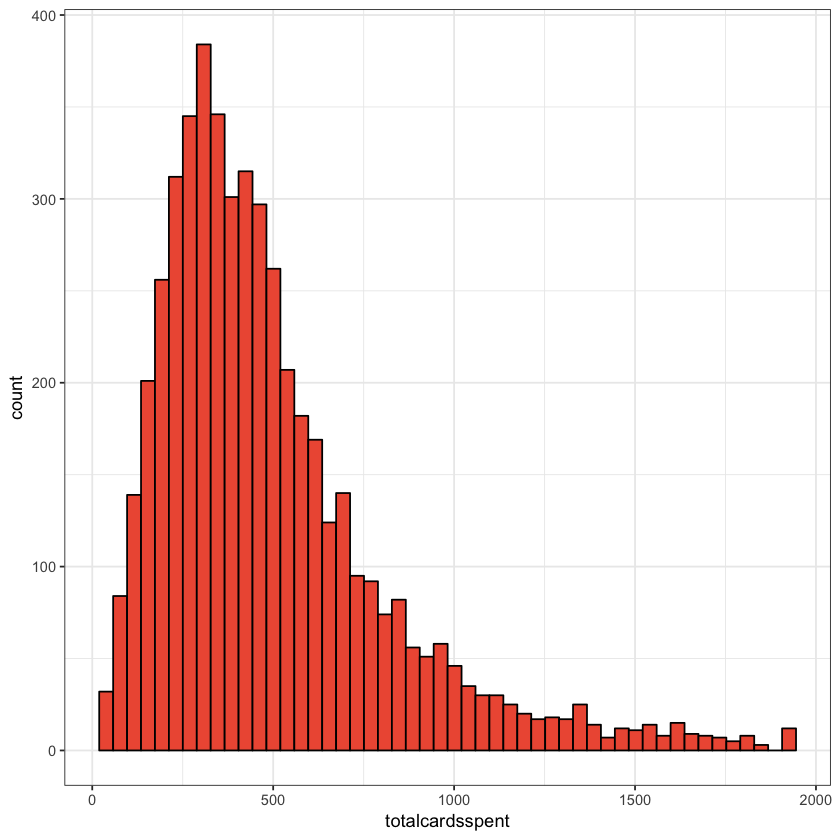

In [15]:
# Looking at the distribution, normal or not, totally skewed, so we need to transform
ggplot(data = custDb_var_data) + aes(totalcardsspent) +
  geom_histogram(bins = 50,fill = "tomato2",color = "black") + 
  theme_bw()

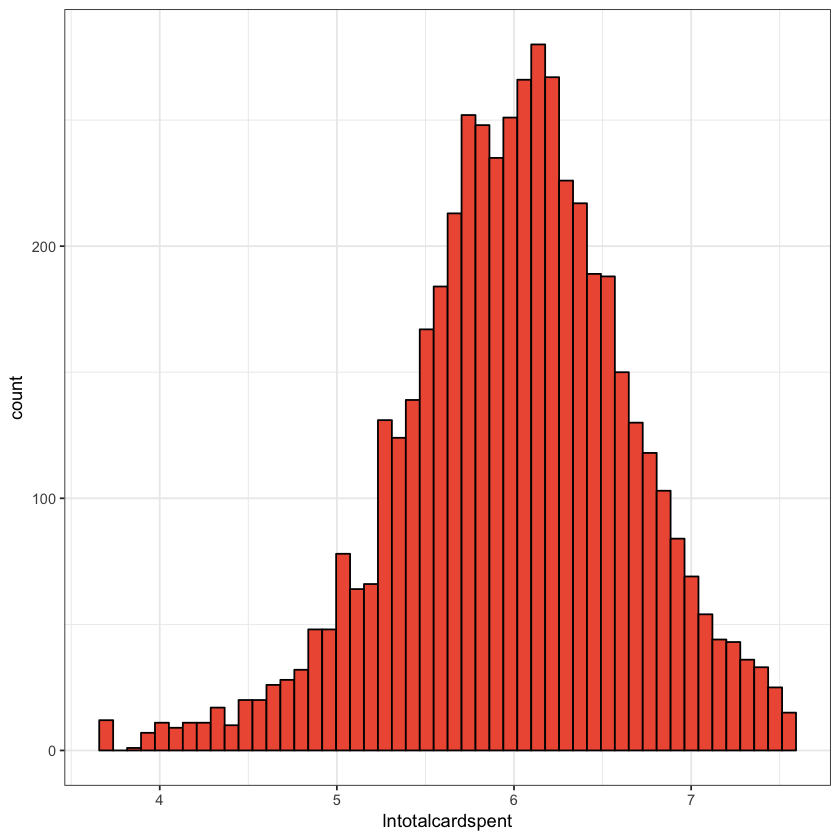

In [16]:
# Log transform
custDb_var_data$lntotalcardspent <- log(custDb_var_data$totalcardsspent)
ggplot(data = custDb_var_data) + aes(lntotalcardspent) +
  geom_histogram(bins = 50,fill = "tomato2",color = "black") + 
  theme_bw()

Warning message:
“Removed 913 rows containing non-finite values (stat_bin).”ERROR while rich displaying an object: Error in if (length(unique(intervals)) > 1 & any(diff(scale(intervals)) < : missing value where TRUE/FALSE needed

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr,

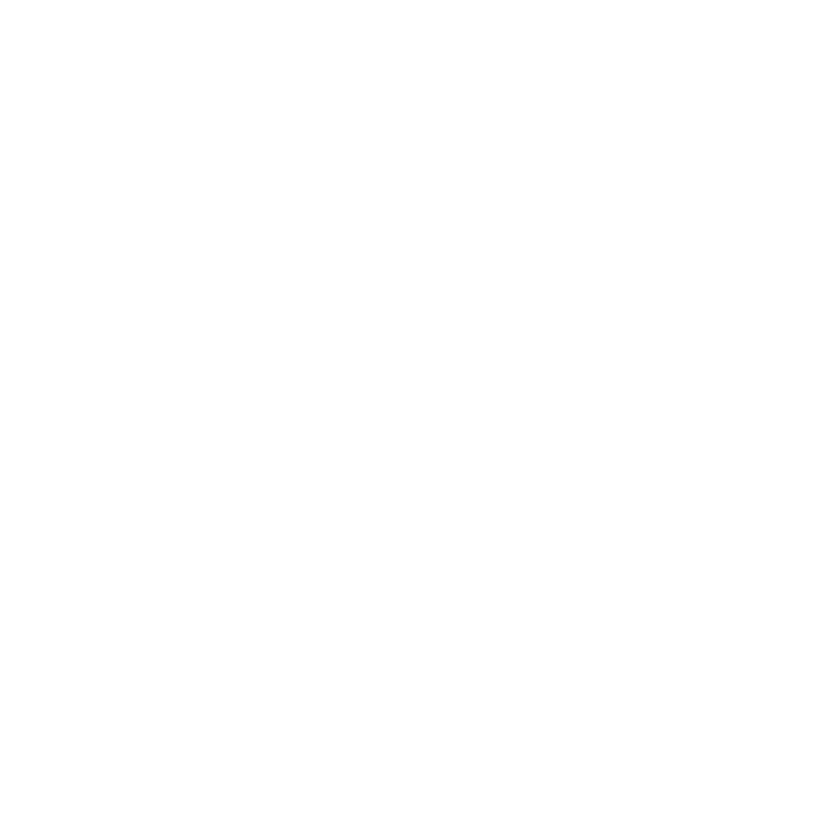

In [17]:
# Exponential transform
custDb_var_data$exptotalcardspent <- exp(custDb_var_data$totalcardsspent)
ggplot(data = custDb_var_data) + aes(exptotalcardspent) +
  geom_histogram(bins = 50,fill = "tomato2",color = "black") + 
  theme_bw()

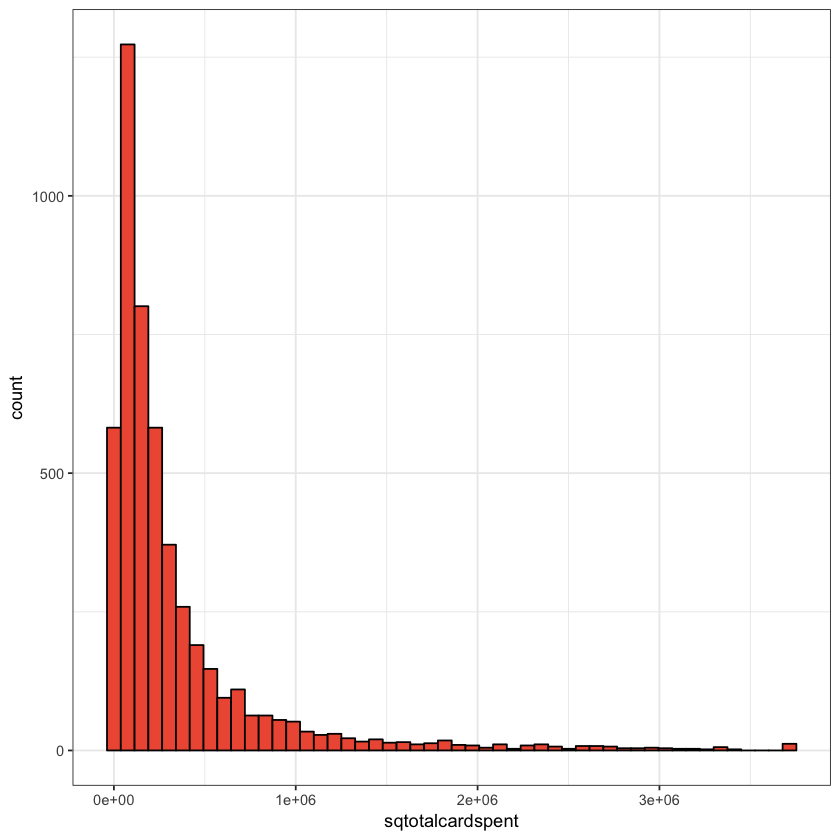

In [18]:
# Square transform
custDb_var_data$sqtotalcardspent <- custDb_var_data$totalcardsspent ^ 2
ggplot(data = custDb_var_data) + aes(sqtotalcardspent) +
  geom_histogram(bins = 50,fill = "tomato2",color = "black") + 
  theme_bw()

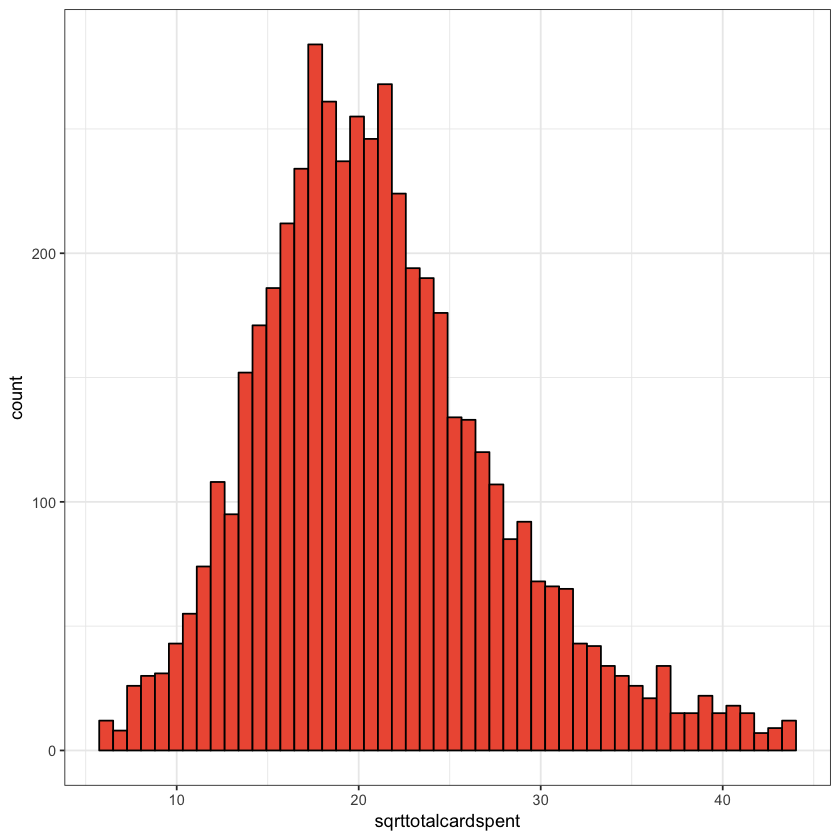

In [19]:
# Squareroot transform
custDb_var_data$sqrttotalcardspent <- sqrt(custDb_var_data$totalcardsspent)
ggplot(data = custDb_var_data) + aes(sqrttotalcardspent) +
  geom_histogram(bins = 50,fill = "tomato2",color = "black") +
  theme_bw()


In [20]:
# Exponential transform can't be used since we have infinity in the results, how to utilize?
# Since Log transform and sqrt transform is very similar eyeballing from hist, need a better way to compare
# Comparing the two, we take the closest to zero, in this case, it is Log Tranformation
e1071::skewness(custDb_var_data$lntotalcardspent)
e1071::skewness(custDb_var_data$sqrttotalcardspent)

[1] -0.3381841

[1] 0.6795889

In [21]:
# Getting rid of unwanted columns anymore
coll <- c("sqrttotalcardspent",'sqtotalcardspent','exptotalcardspent','totalcardsspent','cardspent','card2spent')
custDb_var_data[coll] <- NULL

In [22]:
# Splitting Data
samp<-sample(1:nrow(custDb_var_data), floor(nrow(custDb_var_data)*0.7))
dev<-custDb_var_data[samp,]
val<-custDb_var_data[-samp,]

In [23]:
# Developing first model
fit <- lm(lntotalcardspent ~., data=dev )
summary(fit)


Call:
lm(formula = lntotalcardspent ~ ., data = dev)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2112 -0.2682 -0.0189  0.2526  1.4101 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.318e+00  1.572e-01  27.463  < 2e-16 ***
region             8.042e-03  5.141e-03   1.564  0.11783    
townsize          -3.062e-03  6.236e-03  -0.491  0.62347    
gender            -6.137e-02  1.337e-02  -4.590 4.59e-06 ***
age               -3.438e-03  1.829e-03  -1.880  0.06023 .  
agecat             3.806e-02  2.249e-02   1.692  0.09074 .  
birthmonth         3.473e-03  1.945e-03   1.785  0.07429 .  
ed                -8.829e-03  8.361e-03  -1.056  0.29107    
edcat              3.658e-03  2.176e-02   0.168  0.86653    
jobcat            -3.311e-03  4.695e-03  -0.705  0.48070    
union             -1.906e-03  1.847e-02  -0.103  0.91783    
employ            -1.183e-05  1.971e-03  -0.006  0.99521    
empcat            -2.913e-03  1.276e-02  -0.

In [24]:
# Using stepwise regression to get better model
stepped <- MASS::stepAIC(fit, direction = "both", use.parallel=TRUE, num.cores = 2)

Start:  AIC=-6527.31
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + edcat + jobcat + union + employ + empcat + 
    retire + income + lninc + inccat + debtinc + creddebt + othdebt + 
    default + jobsat + marital + spoused + spousedcat + reside + 
    pets + pets_cats + pets_dogs + pets_birds + pets_reptiles + 
    pets_small + pets_saltfish + pets_freshfish + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carcatvalue + carbought + carbuy + commute + commutecat + 
    commutetime + commutecar + commutemotorcycle + commutecarpool + 
    commutebus + commuterail + commutepublic + commutebike + 
    commutewalk + commutenonmotor + telecommute + reason + polview + 
    polparty + polcontrib + vote + card + cardtype + cardbenefit + 
    cardfee + cardtenure + cardtenurecat + card2 + card2type + 
    card2benefit + card2fee + card2tenure + card2tenurecat + 
    carditems + card2items + active + bfast + tenure

                    Df Sum of Sq    RSS     AIC
- polview            1     0.000 506.52 -6531.3
- ownfax             1     0.000 506.52 -6531.3
- commutecar         1     0.000 506.52 -6531.3
- news               1     0.000 506.52 -6531.3
- pets_dogs          1     0.000 506.52 -6531.3
- commutebus         1     0.000 506.52 -6531.3
- polparty           1     0.000 506.52 -6531.3
- cardfee            1     0.000 506.52 -6531.3
- ownipod            1     0.001 506.52 -6531.3
- commutemotorcycle  1     0.001 506.52 -6531.3
- tollmon            1     0.001 506.53 -6531.3
- commutecat         1     0.002 506.53 -6531.3
- union              1     0.002 506.53 -6531.3
- pets_saltfish      1     0.002 506.53 -6531.3
- commuterail        1     0.002 506.53 -6531.3
- pets_freshfish     1     0.004 506.53 -6531.3
- response_01        1     0.004 506.53 -6531.3
- pets               1     0.004 506.53 -6531.3
- edcat              1     0.004 506.53 -6531.3
- card2benefit       1     0.004 506.53 


Step:  AIC=-6533.31
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + edcat + jobcat + union + empcat + retire + 
    income + lninc + inccat + debtinc + creddebt + othdebt + 
    default + jobsat + marital + spoused + spousedcat + reside + 
    pets + pets_cats + pets_dogs + pets_birds + pets_reptiles + 
    pets_small + pets_saltfish + pets_freshfish + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carcatvalue + carbought + carbuy + commute + commutecat + 
    commutetime + commutecar + commutemotorcycle + commutecarpool + 
    commutebus + commuterail + commutepublic + commutebike + 
    commutewalk + commutenonmotor + telecommute + reason + polparty + 
    polcontrib + vote + card + cardtype + cardbenefit + cardfee + 
    cardtenure + cardtenurecat + card2 + card2type + card2benefit + 
    card2fee + card2tenure + card2tenurecat + carditems + card2items + 
    active + bfast + tenure + churn + longmon 

                    Df Sum of Sq    RSS     AIC
- news               1     0.000 506.52 -6537.3
- pets_dogs          1     0.000 506.52 -6537.3
- commutebus         1     0.000 506.52 -6537.3
- polparty           1     0.000 506.52 -6537.3
- cardfee            1     0.000 506.52 -6537.3
- ownipod            1     0.001 506.52 -6537.3
- commutemotorcycle  1     0.001 506.53 -6537.3
- tollmon            1     0.001 506.53 -6537.3
- commutecat         1     0.001 506.53 -6537.3
- union              1     0.002 506.53 -6537.3
- pets_saltfish      1     0.002 506.53 -6537.3
- commuterail        1     0.002 506.53 -6537.3
- pets_freshfish     1     0.004 506.53 -6537.3
- response_01        1     0.004 506.53 -6537.3
- pets               1     0.004 506.53 -6537.3
- edcat              1     0.004 506.53 -6537.3
- card2benefit       1     0.004 506.53 -6537.3
- hourstv            1     0.005 506.53 -6537.3
- response_02        1     0.006 506.53 -6537.3
- polcontrib         1     0.006 506.53 


Step:  AIC=-6539.31
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + edcat + jobcat + union + empcat + retire + 
    income + lninc + inccat + debtinc + creddebt + othdebt + 
    default + jobsat + marital + spoused + spousedcat + reside + 
    pets + pets_cats + pets_birds + pets_reptiles + pets_small + 
    pets_saltfish + pets_freshfish + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carcatvalue + 
    carbought + carbuy + commute + commutecat + commutetime + 
    commutemotorcycle + commutecarpool + commutebus + commuterail + 
    commutepublic + commutebike + commutewalk + commutenonmotor + 
    telecommute + reason + polparty + polcontrib + vote + card + 
    cardtype + cardbenefit + cardfee + cardtenure + cardtenurecat + 
    card2 + card2type + card2benefit + card2fee + card2tenure + 
    card2tenurecat + carditems + card2items + active + bfast + 
    tenure + churn + longmon + lnlongmon + longten + t

                    Df Sum of Sq    RSS     AIC
- polparty           1     0.000 506.53 -6543.3
- cardfee            1     0.000 506.53 -6543.3
- ownipod            1     0.001 506.53 -6543.3
- tollmon            1     0.001 506.53 -6543.3
- commutemotorcycle  1     0.001 506.53 -6543.3
- commutecat         1     0.001 506.53 -6543.3
- union              1     0.002 506.53 -6543.3
- commuterail        1     0.002 506.53 -6543.3
- response_01        1     0.004 506.53 -6543.3
- edcat              1     0.004 506.53 -6543.3
- card2benefit       1     0.004 506.53 -6543.3
- hourstv            1     0.005 506.53 -6543.3
- pets_saltfish      1     0.006 506.53 -6543.3
- response_02        1     0.006 506.53 -6543.3
- polcontrib         1     0.006 506.53 -6543.3
- default            1     0.006 506.53 -6543.3
- tollten            1     0.007 506.53 -6543.3
- equipten           1     0.008 506.53 -6543.3
- reside             1     0.010 506.53 -6543.2
- card2tenure        1     0.010 506.54 


Step:  AIC=-6545.3
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + edcat + jobcat + union + empcat + retire + 
    income + lninc + inccat + debtinc + creddebt + othdebt + 
    default + jobsat + marital + spoused + spousedcat + reside + 
    pets + pets_cats + pets_birds + pets_reptiles + pets_small + 
    pets_saltfish + pets_freshfish + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carcatvalue + 
    carbought + carbuy + commute + commutecat + commutetime + 
    commutemotorcycle + commutecarpool + commuterail + commutepublic + 
    commutebike + commutewalk + commutenonmotor + telecommute + 
    reason + polcontrib + vote + card + cardtype + cardbenefit + 
    cardtenure + cardtenurecat + card2 + card2type + card2benefit + 
    card2fee + card2tenure + card2tenurecat + carditems + card2items + 
    active + bfast + tenure + churn + longmon + lnlongmon + longten + 
    tollfree + tollmon + tollten + equip

                    Df Sum of Sq    RSS     AIC
- tollmon            1     0.001 506.53 -6549.3
- commutemotorcycle  1     0.001 506.53 -6549.3
- commutecat         1     0.001 506.53 -6549.3
- union              1     0.002 506.53 -6549.3
- commuterail        1     0.002 506.53 -6549.3
- response_01        1     0.004 506.53 -6549.3
- edcat              1     0.004 506.53 -6549.3
- card2benefit       1     0.004 506.53 -6549.3
- hourstv            1     0.005 506.53 -6549.3
- response_02        1     0.006 506.53 -6549.3
- pets_saltfish      1     0.006 506.53 -6549.3
- default            1     0.006 506.53 -6549.3
- polcontrib         1     0.007 506.53 -6549.3
- tollten            1     0.007 506.53 -6549.2
- equipten           1     0.008 506.53 -6549.2
- reside             1     0.010 506.54 -6549.2
- card2tenure        1     0.011 506.54 -6549.2
- tenure             1     0.012 506.54 -6549.2
- pets_freshfish     1     0.014 506.54 -6549.2
- empcat             1     0.015 506.54 


Step:  AIC=-6551.28
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + edcat + jobcat + union + empcat + retire + 
    income + lninc + inccat + debtinc + creddebt + othdebt + 
    default + jobsat + marital + spoused + spousedcat + reside + 
    pets + pets_cats + pets_birds + pets_reptiles + pets_small + 
    pets_saltfish + pets_freshfish + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carcatvalue + 
    carbought + carbuy + commute + commutecat + commutetime + 
    commutecarpool + commuterail + commutepublic + commutebike + 
    commutewalk + commutenonmotor + telecommute + reason + polcontrib + 
    vote + card + cardtype + cardbenefit + cardtenure + cardtenurecat + 
    card2 + card2type + card2benefit + card2fee + card2tenure + 
    card2tenurecat + carditems + card2items + active + bfast + 
    tenure + churn + longmon + lnlongmon + longten + tollfree + 
    tollten + equip + equipmon + equipten + call

                    Df Sum of Sq    RSS     AIC
- union              1     0.002 506.53 -6555.3
- commuterail        1     0.002 506.53 -6555.3
- response_01        1     0.004 506.53 -6555.2
- edcat              1     0.004 506.53 -6555.2
- card2benefit       1     0.004 506.53 -6555.2
- hourstv            1     0.005 506.53 -6555.2
- response_02        1     0.006 506.54 -6555.2
- pets_saltfish      1     0.006 506.54 -6555.2
- default            1     0.006 506.54 -6555.2
- polcontrib         1     0.007 506.54 -6555.2
- equipten           1     0.007 506.54 -6555.2
- reside             1     0.009 506.54 -6555.2
- card2tenure        1     0.011 506.54 -6555.2
- tenure             1     0.013 506.54 -6555.2
- pets_freshfish     1     0.014 506.54 -6555.2
- empcat             1     0.015 506.54 -6555.2
- commutenonmotor    1     0.016 506.55 -6555.2
- pets_birds         1     0.016 506.55 -6555.2
- pets               1     0.016 506.55 -6555.2
- pets_small         1     0.017 506.55 


Step:  AIC=-6557.25
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + edcat + jobcat + empcat + retire + income + 
    lninc + inccat + debtinc + creddebt + othdebt + default + 
    jobsat + marital + spoused + spousedcat + reside + pets + 
    pets_cats + pets_birds + pets_reptiles + pets_small + pets_saltfish + 
    pets_freshfish + homeown + hometype + address + addresscat + 
    cars + carown + cartype + carvalue + carcatvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutepublic + 
    commutebike + commutewalk + commutenonmotor + telecommute + 
    reason + polcontrib + vote + card + cardtype + cardbenefit + 
    cardtenure + cardtenurecat + card2 + card2type + card2benefit + 
    card2fee + card2tenure + card2tenurecat + carditems + card2items + 
    active + bfast + tenure + churn + longmon + lnlongmon + longten + 
    tollfree + tollten + equip + equipmon + equipten + callcard + 
    cardmon + cardten + wireless

                    Df Sum of Sq    RSS     AIC
- edcat              1     0.004 506.54 -6561.2
- card2benefit       1     0.004 506.54 -6561.2
- hourstv            1     0.005 506.54 -6561.2
- pets_saltfish      1     0.006 506.54 -6561.2
- default            1     0.006 506.54 -6561.2
- response_02        1     0.006 506.54 -6561.2
- equipten           1     0.007 506.54 -6561.2
- polcontrib         1     0.007 506.54 -6561.2
- reside             1     0.009 506.55 -6561.2
- card2tenure        1     0.011 506.55 -6561.1
- tenure             1     0.013 506.55 -6561.1
- pets_freshfish     1     0.014 506.55 -6561.1
- empcat             1     0.015 506.55 -6561.1
- commutenonmotor    1     0.016 506.55 -6561.1
- pets_birds         1     0.017 506.55 -6561.1
- pets_small         1     0.017 506.55 -6561.1
- pets               1     0.017 506.55 -6561.1
- ownvcr             1     0.017 506.55 -6561.1
- vote               1     0.018 506.55 -6561.1
- cardmon            1     0.023 506.56 


Step:  AIC=-6563.17
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + empcat + retire + income + lninc + 
    inccat + debtinc + creddebt + othdebt + default + jobsat + 
    marital + spoused + spousedcat + reside + pets + pets_cats + 
    pets_birds + pets_reptiles + pets_small + pets_saltfish + 
    pets_freshfish + homeown + hometype + address + addresscat + 
    cars + carown + cartype + carvalue + carcatvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutepublic + 
    commutebike + commutewalk + commutenonmotor + telecommute + 
    reason + polcontrib + vote + card + cardtype + cardbenefit + 
    cardtenure + cardtenurecat + card2 + card2type + card2fee + 
    card2tenure + card2tenurecat + carditems + card2items + active + 
    bfast + tenure + churn + longmon + lnlongmon + longten + 
    tollfree + tollten + equip + equipmon + equipten + callcard + 
    cardmon + cardten + wireless + wiremon + wireten + 


Step:  AIC=-6567.09
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + empcat + retire + income + lninc + 
    inccat + debtinc + creddebt + othdebt + default + jobsat + 
    marital + spoused + spousedcat + reside + pets + pets_cats + 
    pets_birds + pets_reptiles + pets_small + pets_freshfish + 
    homeown + hometype + address + addresscat + cars + carown + 
    cartype + carvalue + carcatvalue + carbought + carbuy + commute + 
    commutetime + commutecarpool + commutepublic + commutebike + 
    commutewalk + commutenonmotor + telecommute + reason + polcontrib + 
    vote + card + cardtype + cardbenefit + cardtenure + cardtenurecat + 
    card2 + card2type + card2fee + card2tenure + card2tenurecat + 
    carditems + card2items + active + bfast + tenure + churn + 
    longmon + lnlongmon + longten + tollfree + tollten + equip + 
    equipmon + equipten + callcard + cardmon + cardten + wireless + 
    wiremon + wireten + multline + voice


Step:  AIC=-6571.01
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + empcat + retire + income + lninc + 
    inccat + debtinc + creddebt + othdebt + jobsat + marital + 
    spoused + spousedcat + reside + pets + pets_cats + pets_birds + 
    pets_reptiles + pets_small + pets_freshfish + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carcatvalue + carbought + carbuy + commute + commutetime + 
    commutecarpool + commutepublic + commutebike + commutewalk + 
    commutenonmotor + telecommute + reason + polcontrib + vote + 
    card + cardtype + cardbenefit + cardtenure + cardtenurecat + 
    card2 + card2type + card2fee + card2tenure + card2tenurecat + 
    carditems + card2items + active + bfast + tenure + churn + 
    longmon + lnlongmon + longten + tollfree + tollten + equip + 
    equipmon + equipten + callcard + cardmon + cardten + wireless + 
    wiremon + wireten + multline + voice + pager +


Step:  AIC=-6574.91
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + empcat + retire + income + lninc + 
    inccat + debtinc + creddebt + othdebt + jobsat + marital + 
    spoused + spousedcat + reside + pets + pets_cats + pets_birds + 
    pets_reptiles + pets_small + pets_freshfish + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carcatvalue + carbought + carbuy + commute + commutetime + 
    commutecarpool + commutepublic + commutebike + commutewalk + 
    commutenonmotor + telecommute + reason + vote + card + cardtype + 
    cardbenefit + cardtenure + cardtenurecat + card2 + card2type + 
    card2fee + card2tenure + card2tenurecat + carditems + card2items + 
    active + bfast + tenure + churn + longmon + lnlongmon + longten + 
    tollfree + tollten + equip + equipmon + callcard + cardmon + 
    cardten + wireless + wiremon + wireten + multline + voice + 
    pager + internet + callid + cal


Step:  AIC=-6578.76
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + empcat + retire + income + lninc + 
    inccat + debtinc + creddebt + othdebt + jobsat + marital + 
    spoused + spousedcat + pets + pets_cats + pets_birds + pets_reptiles + 
    pets_small + pets_freshfish + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carcatvalue + 
    carbought + carbuy + commute + commutetime + commutecarpool + 
    commutepublic + commutebike + commutewalk + commutenonmotor + 
    telecommute + reason + vote + card + cardtype + cardbenefit + 
    cardtenure + cardtenurecat + card2 + card2type + card2fee + 
    card2tenurecat + carditems + card2items + active + bfast + 
    tenure + churn + longmon + lnlongmon + longten + tollfree + 
    tollten + equip + equipmon + callcard + cardmon + cardten + 
    wireless + wiremon + wireten + multline + voice + pager + 
    internet + callid + callwait + forward + confe


Step:  AIC=-6582.57
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + empcat + retire + income + lninc + 
    inccat + debtinc + creddebt + othdebt + jobsat + marital + 
    spoused + spousedcat + pets + pets_cats + pets_birds + pets_reptiles + 
    pets_small + pets_freshfish + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carcatvalue + 
    carbought + carbuy + commute + commutetime + commutecarpool + 
    commutepublic + commutebike + commutewalk + telecommute + 
    reason + vote + card + cardtype + cardbenefit + cardtenure + 
    cardtenurecat + card2 + card2type + card2fee + card2tenurecat + 
    carditems + card2items + active + bfast + churn + longmon + 
    lnlongmon + longten + tollfree + tollten + equip + equipmon + 
    callcard + cardmon + cardten + wireless + wiremon + wireten + 
    multline + voice + pager + internet + callid + callwait + 
    forward + confer + ebill + owntv + ownvcr 


Step:  AIC=-6586.34
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets + pets_cats + pets_birds + pets_reptiles + 
    pets_small + pets_freshfish + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carcatvalue + 
    carbought + carbuy + commute + commutetime + commutecarpool + 
    commutepublic + commutebike + commutewalk + telecommute + 
    reason + card + cardtype + cardbenefit + cardtenure + cardtenurecat + 
    card2 + card2type + card2fee + card2tenurecat + carditems + 
    card2items + active + bfast + churn + longmon + lnlongmon + 
    longten + tollfree + tollten + equip + equipmon + callcard + 
    cardmon + cardten + wireless + wiremon + wireten + multline + 
    voice + pager + internet + callid + callwait + forward + 
    confer + ebill + owntv + ownvcr + owndvd + owncd


Step:  AIC=-6590.05
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets + pets_cats + pets_reptiles + pets_small + 
    pets_freshfish + homeown + hometype + address + addresscat + 
    cars + carown + cartype + carvalue + carcatvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutepublic + 
    commutebike + commutewalk + telecommute + reason + card + 
    cardtype + cardbenefit + cardtenure + cardtenurecat + card2 + 
    card2type + card2fee + card2tenurecat + carditems + card2items + 
    active + bfast + churn + longmon + lnlongmon + longten + 
    tollfree + tollten + equip + equipmon + callcard + cardmon + 
    cardten + wireless + wiremon + wireten + multline + voice + 
    pager + internet + callid + callwait + forward + confer + 
    ebill + owntv + owndvd + owncd + ownpda + ownpc + ow


Step:  AIC=-6593.93
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + pets_small + homeown + 
    hometype + address + addresscat + cars + carown + cartype + 
    carvalue + carcatvalue + carbought + carbuy + commute + commutetime + 
    commutecarpool + commutepublic + commutebike + commutewalk + 
    telecommute + reason + card + cardtype + cardbenefit + cardtenure + 
    cardtenurecat + card2 + card2type + card2fee + card2tenurecat + 
    carditems + card2items + active + bfast + churn + longmon + 
    lnlongmon + longten + tollfree + tollten + equip + equipmon + 
    callcard + cardmon + cardten + wireless + wiremon + wireten + 
    multline + voice + pager + internet + callid + callwait + 
    forward + confer + ebill + owntv + owndvd + owncd + ownpda + 
    ownpc + owngame + response_03

   


Step:  AIC=-6597.69
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carcatvalue + carbought + carbuy + commute + commutetime + 
    commutecarpool + commutebike + commutewalk + telecommute + 
    reason + card + cardtype + cardbenefit + cardtenure + cardtenurecat + 
    card2 + card2type + card2fee + card2tenurecat + carditems + 
    card2items + active + bfast + churn + longmon + lnlongmon + 
    longten + tollfree + tollten + equip + equipmon + callcard + 
    cardmon + cardten + wireless + wiremon + wireten + multline + 
    voice + pager + internet + callid + callwait + forward + 
    confer + ebill + owntv + owndvd + owncd + ownpda + ownpc + 
    owngame + response_03

                    Df Sum of Sq


Step:  AIC=-6601.29
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carcatvalue + carbought + carbuy + commute + commutetime + 
    commutecarpool + commutebike + commutewalk + telecommute + 
    reason + card + cardtype + cardbenefit + cardtenure + cardtenurecat + 
    card2 + card2type + card2fee + card2tenurecat + carditems + 
    card2items + active + bfast + churn + longmon + lnlongmon + 
    longten + tollfree + tollten + equip + equipmon + callcard + 
    cardten + wireless + wiremon + wireten + multline + voice + 
    pager + internet + callid + callwait + forward + confer + 
    ebill + owntv + owncd + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- tollte


Step:  AIC=-6604.84
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carbought + carbuy + commute + commutetime + commutecarpool + 
    commutebike + commutewalk + telecommute + reason + card + 
    cardtype + cardbenefit + cardtenure + cardtenurecat + card2 + 
    card2type + card2fee + card2tenurecat + carditems + card2items + 
    active + bfast + churn + longmon + lnlongmon + longten + 
    tollfree + equip + equipmon + callcard + cardten + wireless + 
    wiremon + wireten + multline + voice + pager + internet + 
    callid + callwait + forward + confer + ebill + owntv + owncd + 
    ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- pager              1     0.035


Step:  AIC=-6608.35
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carbought + carbuy + commute + commutetime + commutecarpool + 
    commutebike + commutewalk + telecommute + reason + card + 
    cardtype + cardbenefit + cardtenure + cardtenurecat + card2 + 
    card2type + card2fee + card2tenurecat + carditems + card2items + 
    active + bfast + churn + longmon + lnlongmon + longten + 
    tollfree + equip + equipmon + callcard + cardten + wireless + 
    wiremon + wireten + multline + voice + internet + callid + 
    callwait + forward + ebill + owntv + owncd + ownpda + ownpc + 
    owngame + response_03

                    Df Sum of Sq    RSS     AIC
- callwait           1     0.035 506.99 -6610.1
-


Step:  AIC=-6611.83
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carbought + carbuy + commute + commutetime + commutecarpool + 
    commutebike + commutewalk + telecommute + reason + card + 
    cardtype + cardbenefit + cardtenure + cardtenurecat + card2 + 
    card2type + card2fee + card2tenurecat + carditems + card2items + 
    active + bfast + churn + longmon + lnlongmon + longten + 
    tollfree + equip + equipmon + callcard + cardten + wireless + 
    wiremon + wireten + multline + voice + internet + callid + 
    forward + owntv + owncd + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- cardtenure         1     0.043 507.07 -6613.5
- telecommute        1   


Step:  AIC=-6615.23
lntotalcardspent ~ region + townsize + gender + age + agecat + 
    birthmonth + ed + jobcat + retire + income + lninc + inccat + 
    debtinc + creddebt + othdebt + jobsat + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + homeown + hometype + 
    address + addresscat + cars + carown + cartype + carvalue + 
    carbought + carbuy + commute + commutetime + commutecarpool + 
    commutebike + commutewalk + telecommute + reason + card + 
    cardtype + cardbenefit + cardtenurecat + card2 + card2type + 
    card2fee + card2tenurecat + carditems + card2items + active + 
    churn + longmon + lnlongmon + longten + tollfree + equip + 
    equipmon + callcard + cardten + wireless + wiremon + wireten + 
    multline + voice + internet + callid + forward + owntv + 
    owncd + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- telecommute        1     0.046 507.16 -6616.9
- townsize           1     0.046 507.16 -6616.


Step:  AIC=-6618.61
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + inccat + debtinc + 
    creddebt + othdebt + jobsat + marital + spoused + spousedcat + 
    pets_cats + pets_reptiles + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutebike + 
    commutewalk + reason + card + cardtype + cardbenefit + cardtenurecat + 
    card2 + card2type + card2fee + card2tenurecat + carditems + 
    card2items + active + churn + longmon + lnlongmon + longten + 
    tollfree + equip + equipmon + callcard + cardten + wireless + 
    wiremon + wireten + multline + voice + internet + callid + 
    forward + owntv + owncd + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- commutebike        1     0.047 507.25 -6620.3
- owntv              1     0.051 507.26 -6620.3
- owncd              1     0


Step:  AIC=-6621.95
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + inccat + debtinc + 
    creddebt + othdebt + jobsat + marital + spoused + spousedcat + 
    pets_cats + pets_reptiles + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutewalk + 
    reason + card + cardtype + cardbenefit + cardtenurecat + 
    card2 + card2type + card2fee + card2tenurecat + carditems + 
    card2items + active + churn + longmon + lnlongmon + longten + 
    tollfree + equip + equipmon + callcard + cardten + wireless + 
    wiremon + wireten + multline + voice + internet + callid + 
    forward + owncd + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- owncd              1     0.035 507.34 -6623.7
- multline           1     0.065 507.37 -6623.5
- card2fee           1     0.070 507.37 -6623.5
- 


Step:  AIC=-6625.26
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + inccat + debtinc + 
    creddebt + othdebt + jobsat + marital + spoused + spousedcat + 
    pets_cats + pets_reptiles + homeown + hometype + address + 
    addresscat + cars + carown + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutewalk + 
    reason + card + cardtype + cardbenefit + cardtenurecat + 
    card2 + card2type + card2fee + card2tenurecat + carditems + 
    card2items + active + churn + longmon + lnlongmon + longten + 
    tollfree + equip + equipmon + callcard + cardten + wireless + 
    wiremon + wireten + voice + internet + callid + forward + 
    ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- carown             1     0.072 507.47 -6626.8
- homeown            1     0.072 507.47 -6626.8
- card2fee           1     0.073 507.47 -6626.8
- card2tenurecat     


Step:  AIC=-6628.32
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + homeown + hometype + address + addresscat + 
    cars + cartype + carvalue + carbought + carbuy + commute + 
    commutetime + commutecarpool + commutewalk + reason + card + 
    cardtype + cardbenefit + cardtenurecat + card2 + card2type + 
    card2fee + card2tenurecat + carditems + card2items + active + 
    churn + longmon + lnlongmon + longten + tollfree + equip + 
    equipmon + callcard + cardten + wireless + wiremon + wireten + 
    voice + internet + callid + forward + ownpda + ownpc + owngame + 
    response_03

                    Df Sum of Sq    RSS     AIC
- cardbenefit        1     0.067 507.60 -6629.9
- card2tenurecat     1     0.070 507.61 -6629.8
- card2fee           1     0.076 507.61 -6629.8
- address            1     0.077 507.61


Step:  AIC=-6631.39
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + homeown + hometype + address + addresscat + 
    cars + cartype + carvalue + carbought + carbuy + commute + 
    commutetime + commutecarpool + commutewalk + reason + card + 
    cardtype + cardtenurecat + card2 + card2type + card2fee + 
    carditems + card2items + active + churn + longmon + lnlongmon + 
    longten + tollfree + equip + equipmon + callcard + cardten + 
    wireless + wiremon + wireten + voice + internet + callid + 
    forward + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- cardtenurecat      1     0.019 507.69 -6633.3
- address            1     0.074 507.75 -6632.9
- card2fee           1     0.077 507.75 -6632.9
- homeown            1     0.081 507.75 -6632.8
- addresscat         1     


Step:  AIC=-6634.73
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + homeown + hometype + address + addresscat + 
    cars + cartype + carvalue + carbought + carbuy + commute + 
    commutetime + commutecarpool + commutewalk + reason + card + 
    cardtype + card2 + card2type + carditems + card2items + active + 
    churn + longmon + lnlongmon + longten + tollfree + equip + 
    equipmon + callcard + cardten + wireless + wiremon + wireten + 
    voice + internet + callid + forward + ownpda + ownpc + owngame + 
    response_03

                    Df Sum of Sq    RSS     AIC
- homeown            1     0.081 507.85 -6636.2
- address            1     0.086 507.85 -6636.1
- reason             1     0.099 507.87 -6636.1
- addresscat         1     0.115 507.88 -6635.9
- forward            1     0.128 507.90 -6635.8
- inco


Step:  AIC=-6637.69
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + addresscat + cars + cartype + 
    carvalue + carbought + carbuy + commute + commutetime + commutecarpool + 
    commutewalk + reason + card + cardtype + card2 + card2type + 
    carditems + card2items + active + churn + longmon + lnlongmon + 
    longten + tollfree + equip + equipmon + callcard + cardten + 
    wireless + wiremon + wireten + voice + internet + callid + 
    forward + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- addresscat         1     0.055 507.97 -6639.3
- reason             1     0.098 508.02 -6639.0
- forward            1     0.129 508.05 -6638.8
- equip              1     0.144 508.06 -6638.7
- callid             1     0.149 508.07 -6638.7
- income             1     0.15


Step:  AIC=-6640.63
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + cars + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutewalk + 
    card + cardtype + card2 + card2type + carditems + card2items + 
    active + churn + longmon + lnlongmon + longten + tollfree + 
    equip + equipmon + callcard + cardten + wireless + wiremon + 
    wireten + voice + internet + callid + forward + ownpda + 
    ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- forward            1     0.126 508.20 -6641.8
- equip              1     0.138 508.21 -6641.7
- tollfree           1     0.150 508.22 -6641.6
- income             1     0.156 508.23 -6641.6
- jobcat             1     0.158 508.23 -6641.5
- ownpda             1     0.159 508.23 -6641.5
- cal


Step:  AIC=-6643.2
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + cars + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutewalk + 
    card + cardtype + card2 + card2type + carditems + card2items + 
    active + churn + longmon + lnlongmon + longten + equip + 
    equipmon + callcard + cardten + wireless + wiremon + wireten + 
    voice + internet + callid + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- equip              1     0.140 508.42 -6644.2
- income             1     0.159 508.44 -6644.1
- ownpda             1     0.161 508.44 -6644.1
- jobsat             1     0.164 508.44 -6644.1
- jobcat             1     0.165 508.44 -6644.1
- cardten            1     0.176 508.46 -6644.0
- othdebt            1     0.179


Step:  AIC=-6645.83
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + cars + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutewalk + 
    card + cardtype + card2 + card2type + carditems + card2items + 
    active + churn + longmon + lnlongmon + longten + callcard + 
    cardten + wireless + wiremon + wireten + voice + internet + 
    callid + ownpda + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- wireless           1     0.108 508.59 -6647.1
- income             1     0.152 508.63 -6646.8
- jobsat             1     0.159 508.64 -6646.7
- cardten            1     0.163 508.64 -6646.7
- ownpc              1     0.172 508.65 -6646.7
- jobcat             1     0.172 508.65 -6646.7
- othdebt            1     0.182 508.66 -6646.6
- 


Step:  AIC=-6648.31
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + cars + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutewalk + 
    card + cardtype + card2 + card2type + carditems + card2items + 
    active + churn + longmon + lnlongmon + longten + callcard + 
    cardten + wireten + voice + internet + callid + ownpda + 
    ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- ownpda             1     0.127 508.83 -6649.4
- cardten            1     0.153 508.85 -6649.3
- jobsat             1     0.160 508.86 -6649.2
- income             1     0.163 508.86 -6649.2
- othdebt            1     0.166 508.87 -6649.2
- debtinc            1     0.173 508.87 -6649.1
- jobcat             1     0.175 508.87 -6649.1
- carvalue           1 


Step:  AIC=-6650.43
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    othdebt + jobsat + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + cars + cartype + carvalue + carbought + 
    carbuy + commute + commutetime + commutecarpool + commutewalk + 
    card + cardtype + card2 + card2type + carditems + card2items + 
    active + churn + longmon + lnlongmon + longten + callcard + 
    wireten + voice + internet + callid + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- callcard           1     0.148 509.12 -6651.4
- jobsat             1     0.159 509.13 -6651.3
- othdebt            1     0.161 509.13 -6651.3
- debtinc            1     0.166 509.14 -6651.3
- lnlongmon          1     0.168 509.14 -6651.3
- income             1     0.172 509.15 -6651.2
- jobcat             1     0.173 509.15 -6651.2
- commutecarpool     1     0.199 509.17 -6651.1


Step:  AIC=-6652.29
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + debtinc + creddebt + 
    jobsat + marital + spoused + spousedcat + pets_cats + pets_reptiles + 
    hometype + cars + cartype + carvalue + carbought + carbuy + 
    commute + commutetime + commutecarpool + commutewalk + card + 
    cardtype + card2 + card2type + carditems + card2items + active + 
    churn + longmon + lnlongmon + longten + wireten + voice + 
    internet + callid + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- debtinc            1     0.034 509.32 -6654.1
- jobsat             1     0.167 509.45 -6653.1
- jobcat             1     0.180 509.46 -6653.1
- carvalue           1     0.194 509.48 -6653.0
- ownpc              1     0.207 509.49 -6652.9
- cardtype           1     0.210 509.49 -6652.8
- commutecarpool     1     0.210 509.49 -6652.8
- cartype            1     0.217 509.50 -6652.8
- callid            


Step:  AIC=-6654.91
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + creddebt + marital + 
    spoused + spousedcat + pets_cats + pets_reptiles + hometype + 
    cars + cartype + carvalue + carbought + carbuy + commute + 
    commutetime + commutecarpool + commutewalk + card + cardtype + 
    card2 + card2type + carditems + card2items + active + churn + 
    longmon + lnlongmon + longten + wireten + voice + internet + 
    callid + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- creddebt           1     0.193 509.68 -6655.6
- commutecarpool     1     0.202 509.69 -6655.5
- carvalue           1     0.204 509.69 -6655.5
- ownpc              1     0.213 509.70 -6655.5
- cartype            1     0.214 509.70 -6655.4
- active             1     0.216 509.70 -6655.4
- cardtype           1     0.219 509.70 -6655.4
- callid             1     0.222 509.71 -6655.4
- owngame            1     0.231 509.72


Step:  AIC=-6656.22
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + hometype + cars + 
    cartype + carvalue + carbought + carbuy + commute + commutetime + 
    commutewalk + card + cardtype + card2 + card2type + carditems + 
    card2items + active + churn + longmon + lnlongmon + longten + 
    wireten + voice + internet + callid + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- carvalue           1     0.202 510.08 -6656.8
- active             1     0.210 510.09 -6656.8
- callid             1     0.210 510.09 -6656.8
- cartype            1     0.217 510.09 -6656.7
- cardtype           1     0.227 510.10 -6656.7
- ownpc              1     0.229 510.11 -6656.7
- owngame            1     0.241 510.12 -6656.6
- jobcat             1     0.246 510.12 -6656.5
- commutetime        1     0.247 510.12 -6656.5
- response_03        1  


Step:  AIC=-6657.63
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + hometype + cars + 
    cartype + carbuy + commute + commutetime + commutewalk + 
    card + cardtype + card2 + card2type + carditems + card2items + 
    active + churn + longmon + lnlongmon + longten + wireten + 
    voice + internet + callid + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- callid             1     0.210 510.46 -6658.2
- active             1     0.212 510.47 -6658.2
- cardtype           1     0.222 510.48 -6658.1
- ownpc              1     0.224 510.48 -6658.1
- commutetime        1     0.246 510.50 -6657.9
- cartype            1     0.252 510.51 -6657.9
- owngame            1     0.253 510.51 -6657.9
- jobcat             1     0.270 510.52 -6657.8
- lnlongmon          1     0.278 510.53 -6657.7
- card2type          1     0.281 510.53 -6657.7


Step:  AIC=-6658.76
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + hometype + cars + 
    cartype + carbuy + commute + commutetime + commutewalk + 
    card + cardtype + card2 + card2type + carditems + card2items + 
    churn + longmon + lnlongmon + longten + wireten + voice + 
    internet + ownpc + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- ownpc              1     0.226 510.90 -6659.2
- cardtype           1     0.235 510.91 -6659.2
- commutetime        1     0.235 510.91 -6659.2
- cartype            1     0.249 510.92 -6659.1
- card2type          1     0.273 510.95 -6658.9
- agecat             1     0.280 510.95 -6658.8
- carbuy             1     0.284 510.96 -6658.8
- jobcat             1     0.289 510.96 -6658.8
<none>                           510.67 -6658.8
- pets_cats          1     0.293 510.96 -6658.8
- lnlongmon      


Step:  AIC=-6659.64
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + hometype + cars + 
    cartype + carbuy + commute + commutetime + commutewalk + 
    card + card2 + card2type + carditems + card2items + churn + 
    longmon + lnlongmon + longten + wireten + voice + internet + 
    owngame + response_03

                    Df Sum of Sq    RSS     AIC
- cartype            1     0.236 511.36 -6660.0
- commutetime        1     0.239 511.37 -6660.0
- card2type          1     0.252 511.38 -6659.9
- owngame            1     0.253 511.38 -6659.9
- carbuy             1     0.273 511.40 -6659.8
- jobcat             1     0.278 511.41 -6659.7
- agecat             1     0.279 511.41 -6659.7
<none>                           511.13 -6659.6
- pets_cats          1     0.293 511.42 -6659.6
- retire             1     0.301 511.43 -6659.6
- lnlongmon          1     0.303 511


Step:  AIC=-6660.53
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + hometype + carbuy + 
    commute + commutetime + commutewalk + card + card2 + card2type + 
    carditems + card2items + churn + longmon + lnlongmon + longten + 
    wireten + voice + internet + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- commute            1     0.213 511.80 -6661.1
- commutetime        1     0.233 511.82 -6660.9
- owngame            1     0.255 511.84 -6660.8
- jobcat             1     0.257 511.84 -6660.8
- card2type          1     0.260 511.84 -6660.8
- retire             1     0.270 511.85 -6660.7
- agecat             1     0.273 511.86 -6660.7
- carbuy             1     0.280 511.86 -6660.6
- pets_cats          1     0.285 511.87 -6660.6
<none>                           511.58 -6660.5
- lnlongmon          1     0.296 511.88 -6660.5
- hometype


Step:  AIC=-6661.58
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + hometype + carbuy + 
    commutewalk + card + card2 + card2type + carditems + card2items + 
    churn + longmon + lnlongmon + longten + wireten + voice + 
    internet + owngame + response_03

                    Df Sum of Sq    RSS     AIC
- owngame            1     0.240 512.25 -6661.9
- card2type          1     0.252 512.27 -6661.9
- agecat             1     0.256 512.27 -6661.8
- jobcat             1     0.261 512.27 -6661.8
- retire             1     0.265 512.28 -6661.8
- carbuy             1     0.269 512.28 -6661.7
- pets_cats          1     0.279 512.29 -6661.7
<none>                           512.01 -6661.6
- hometype           1     0.304 512.32 -6661.5
- lnlongmon          1     0.310 512.32 -6661.5
- response_03        1     0.339 512.35 -6661.3
- region             1     0.352 5


Step:  AIC=-6662.24
lntotalcardspent ~ region + gender + age + agecat + birthmonth + 
    ed + jobcat + retire + income + lninc + marital + spoused + 
    spousedcat + pets_cats + pets_reptiles + hometype + carbuy + 
    commutewalk + card + card2 + carditems + card2items + churn + 
    longmon + lnlongmon + longten + wireten + voice + internet + 
    response_03

                    Df Sum of Sq    RSS     AIC
- agecat             1     0.258 512.76 -6662.5
- jobcat             1     0.264 512.77 -6662.4
- retire             1     0.272 512.78 -6662.4
- carbuy             1     0.273 512.78 -6662.4
- pets_cats          1     0.280 512.78 -6662.3
- hometype           1     0.293 512.80 -6662.2
<none>                           512.50 -6662.2
- lnlongmon          1     0.325 512.83 -6662.0
- response_03        1     0.325 512.83 -6662.0
+ callid             1     0.254 512.25 -6662.0
- region             1     0.334 512.84 -6662.0
+ card2type          1     0.250 512.25 -6661.9
+ tollfr


Step:  AIC=-6662.78
lntotalcardspent ~ region + gender + age + birthmonth + ed + 
    jobcat + income + lninc + marital + spoused + spousedcat + 
    pets_cats + pets_reptiles + hometype + carbuy + commutewalk + 
    card + card2 + carditems + card2items + churn + longmon + 
    lnlongmon + longten + wireten + voice + internet + response_03

                    Df Sum of Sq    RSS     AIC
- jobcat             1     0.156 513.17 -6663.7
- age                1     0.181 513.19 -6663.5
- carbuy             1     0.266 513.28 -6663.0
<none>                           513.01 -6662.8
- hometype           1     0.304 513.31 -6662.7
- lnlongmon          1     0.306 513.32 -6662.7
- pets_cats          1     0.317 513.33 -6662.6
+ callid             1     0.260 512.75 -6662.6
+ card2type          1     0.258 512.75 -6662.5
- region             1     0.335 513.34 -6662.5
+ retire             1     0.248 512.76 -6662.5
+ owngame            1     0.237 512.77 -6662.4
+ agecat             1     0.23


Step:  AIC=-6664.68
lntotalcardspent ~ region + gender + birthmonth + ed + income + 
    lninc + marital + spoused + spousedcat + pets_cats + pets_reptiles + 
    hometype + carbuy + commutewalk + card + card2 + carditems + 
    card2items + churn + longmon + lnlongmon + longten + wireten + 
    voice + internet + response_03

                    Df Sum of Sq    RSS     AIC
- carbuy             1     0.259 513.58 -6664.9
<none>                           513.32 -6664.7
- hometype           1     0.310 513.63 -6664.6
+ active             1     0.276 513.04 -6664.6
+ callid             1     0.266 513.05 -6664.5
- pets_cats          1     0.322 513.64 -6664.5
+ card2type          1     0.249 513.07 -6664.4
+ jobsat             1     0.236 513.08 -6664.3
+ tollfree           1     0.228 513.09 -6664.2
- region             1     0.362 513.68 -6664.2
+ addresscat         1     0.216 513.10 -6664.2
- response_03        1     0.376 513.69 -6664.1
+ ownpda             1     0.204 513.11 -6664.

In [28]:
# Finding out the final model
stepped$call

lm(formula = lntotalcardspent ~ region + gender + birthmonth + 
    ed + income + lninc + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + commutewalk + card + card2 + carditems + 
    card2items + churn + longmon + lnlongmon + longten + wireten + 
    voice + internet + response_03, data = dev)

In [29]:
# Developing the second model

fit2 <- lm(formula = lntotalcardspent ~ region + gender + birthmonth + 
    ed + income + lninc + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + commutewalk + card + card2 + carditems + 
    card2items + churn + longmon + lnlongmon + longten + wireten + 
    voice + internet + response_03, data = dev)
summary(fit2)


Call:
lm(formula = lntotalcardspent ~ region + gender + birthmonth + 
    ed + income + lninc + marital + spoused + spousedcat + pets_cats + 
    pets_reptiles + hometype + commutewalk + card + card2 + carditems + 
    card2items + churn + longmon + lnlongmon + longten + wireten + 
    voice + internet + response_03, data = dev)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2860 -0.2668 -0.0147  0.2500  1.3459 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.292e+00  8.820e-02  48.659  < 2e-16 ***
region         7.233e-03  4.632e-03   1.562  0.11846    
gender        -6.097e-02  1.308e-02  -4.660 3.27e-06 ***
birthmonth     3.704e-03  1.900e-03   1.950  0.05126 .  
ed            -6.629e-03  2.615e-03  -2.535  0.01129 *  
income         6.339e-04  3.222e-04   1.967  0.04922 *  
lninc          2.638e-01  2.039e-02  12.937  < 2e-16 ***
marital        1.224e-01  6.556e-02   1.867  0.06196 .  
spoused       -1.951e-02  9.432e-03  -2.068  0

In [49]:
# Selecting only significant var

fit3 <- lm(formula = lntotalcardspent ~ gender + ed + lninc + 
    pets_reptiles + commutewalk + card + card2 + carditems + 
    card2items + lnlongmon + wireten + 
    voice + internet, data = dev)
summary(fit3)


Call:
lm(formula = lntotalcardspent ~ gender + ed + lninc + pets_reptiles + 
    commutewalk + card + card2 + carditems + card2items + lnlongmon + 
    wireten + voice + internet, data = dev)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29332 -0.26546 -0.02032  0.25442  1.36522 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.245e+00  6.071e-02  69.923  < 2e-16 ***
gender        -6.281e-02  1.309e-02  -4.798 1.67e-06 ***
ed            -5.949e-03  2.379e-03  -2.500  0.01246 *  
lninc          2.966e-01  9.395e-03  31.569  < 2e-16 ***
pets_reptiles  5.241e-02  2.425e-02   2.161  0.03073 *  
commutewalk   -3.011e-02  1.343e-02  -2.242  0.02502 *  
card          -1.236e-01  6.006e-03 -20.582  < 2e-16 ***
card2         -6.602e-02  6.066e-03 -10.883  < 2e-16 ***
carditems      8.206e-02  1.967e-03  41.722  < 2e-16 ***
card2items     1.120e-01  2.693e-03  41.599  < 2e-16 ***
lnlongmon     -2.622e-02  9.115e-03  -2.877  0.00404 ** 
wire

In [50]:
# Using AIC & BIC to compare between model, choose lowest value between the three
AIC(fit)
AIC(fit2)
AIC(fit3)
BIC(fit)
BIC(fit2)
BIC(fit3)

[1] 3407.257

[1] 3269.656

[1] 3277.337

[1] 4146.519

[1] 3435.99

[1] 3369.745

In [32]:
# Predicting
devvv<-data.frame(cbind(dev,pred_ln_totalcardspent=predict(fit3, newdata=dev)),
                  pred_totalcardspentexp = exp(predict(fit3, newdata=dev)))

In [33]:
# Validating
valll <- data.frame(cbind(val,pred_ln_totalcardspent=predict(fit3, newdata=val)),
                    pred_totalcardspentexp = exp(predict(fit3, newdata=val)))

In [77]:
#MAPE
dev_mape = mean(abs(devvv$lntotalcardspent - devvv$pred_ln_totalcardspent)/devvv$lntotalcardspent)
val_mape = mean(abs(valll$lntotalcardspent - valll$pred_ln_totalcardspent)/valll$lntotalcardspent)
print("Development MAPE")
print( dev_mape)
print("Validation MAPE")
print(val_mape)

[1] "Development MAPE"
[1] 0.05149075
[1] "Validation MAPE"
[1] 0.05200126


In [78]:
#RMSE
print("RMSE Development")
sqrt(mean((devvv$lntotalcardspent - devvv$pred_ln_totalcardspent)**2))
print("RMSE Validating")
sqrt(mean((valll$lntotalcardspent - valll$pred_ln_totalcardspent)**2))

[1] "RMSE Development"


[1] 0.3834384

[1] "RMSE Validating"


[1] 0.3861931

In [79]:
#Correlations
print("Correlations between development and predicted value")
cor(devvv$lntotalcardspent, devvv$pred_ln_totalcardspent)
print("Correlations between validating and predicted value")
cor(valll$lntotalcardspent, valll$pred_ln_totalcardspent)

[1] "Correlations between development and predicted value"


[1] 0.8030448

[1] "Correlations between validating and predicted value"


[1] 0.803466

`geom_smooth()` using method = 'gam'


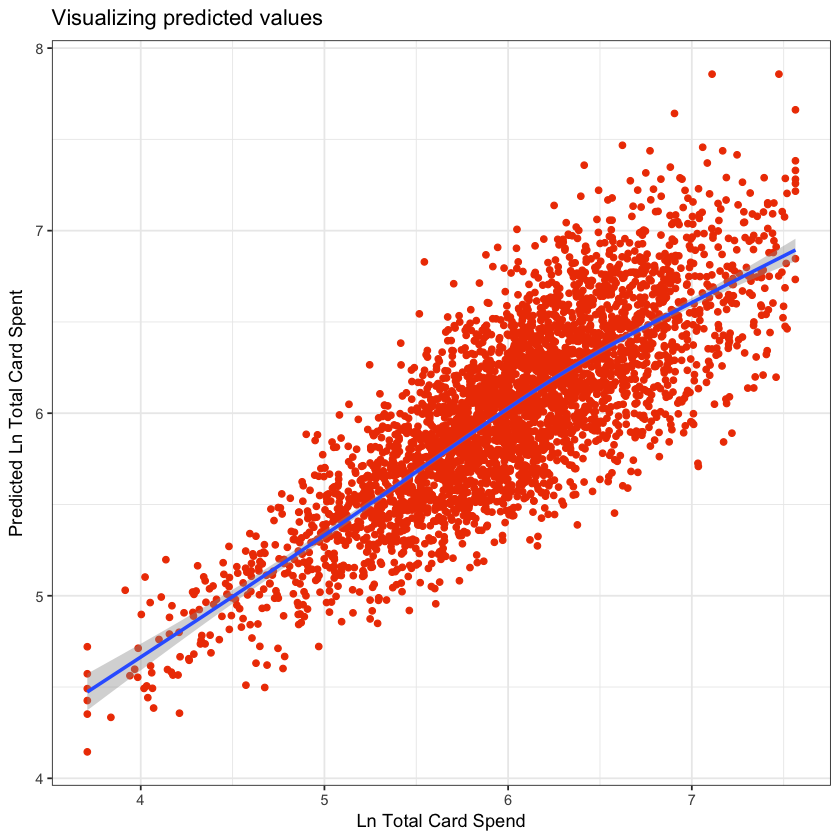

In [57]:
# Visualizing correlation
ggplot(devvv) + aes(x = lntotalcardspent,y = pred_ln_totalcardspent)+ 
labs(title="Visualizing predicted values",x="Ln Total Card Spend", y="Predicted Ln Total Card Spent")+
  geom_point(color = "orangered2") + theme_bw() + geom_smooth()

`geom_smooth()` using method = 'gam'


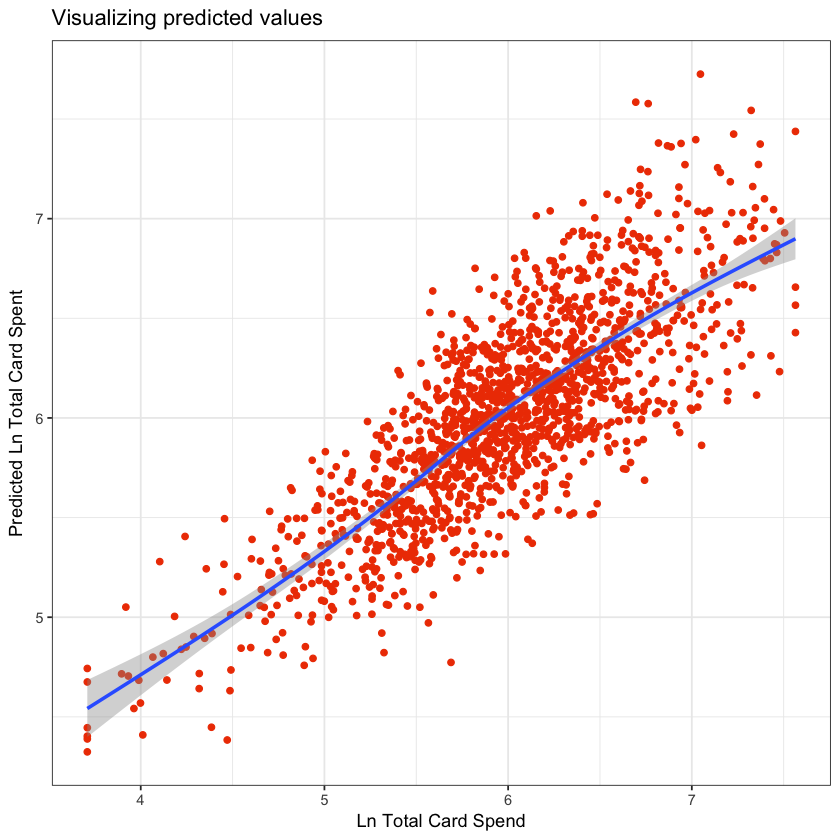

In [60]:
ggplot(valll) + aes(x = lntotalcardspent,y = pred_ln_totalcardspent)+
labs(title="Visualizing predicted values",x="Ln Total Card Spend", y="Predicted Ln Total Card Spent")+
  geom_point(color = "orangered2") + theme_bw() + geom_smooth()